<a href="https://colab.research.google.com/github/sakshisinha-13/Stock-Performance-Analysis/blob/main/Stock_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**





In [ ]:
# Import necessary libraries for data manipulation, visualization, and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf

#  **Install Dependencies (Colab-Specific)**

In [ ]:
# Install mplfinance for financial visualizations
!pip install mplfinance

# **3. Load and Inspect the Dataset**

In [ ]:
# Load the dataset, convert dates, and inspect its structure
# The dataset includes columns such as Open, High, Low, Close, Volume, and Adjusted Close prices.

df = pd.read_csv('/content/sample_data/infy_stock.csv')

In [ ]:
# Display the first 10 rows of the dataset to understand its structure and content

print("\nFirst 10 rows of the dataset:")
print(df.head(10))


First 10 rows of the dataset:
         Date      Open      High       Low     Close  Adj Close    Volume
0  1996-01-01  0.794921  0.796679  0.791015  0.796679   0.549483  204800.0
1  1996-01-02  0.794921  0.798828  0.793457  0.793457   0.547260  204800.0
2  1996-01-03  0.798828  0.798828  0.798828  0.798828   0.550965  102400.0
3  1996-01-04  0.791015  0.794921  0.791015  0.793554   0.547327  307200.0
4  1996-01-05  0.784179  0.784179  0.784179  0.784179   0.540861   51200.0
5  1996-01-08  0.784179  0.791015  0.785156  0.789062   0.544229  358400.0
6  1996-01-09  0.789062  0.781250  0.771484  0.780273   0.538167  870400.0
7  1996-01-10  0.780273  0.775390  0.771484  0.773437   0.533452  358400.0
8  1996-01-11  0.779296  0.791015  0.773437  0.791015   0.545576  819200.0
9  1996-01-12  0.787109  0.787109  0.781250  0.786621   0.542545  358400.0


# **Handle Missing Values**



In [ ]:
# Section 3: Handle Missing Values and Format Data
# Convert 'Date' column to datetime format and set it as the index for time-series analysis.
# Handle missing values using forward fill to maintain data consistency.

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.fillna(method='ffill', inplace=True)

# Inspect the dataset for shape and missing values
print(f"Dataset Shape: {df.shape}")
print("Missing Values:\n", df.isnull().sum())

Dataset Shape: (6501, 6)
Missing Values:
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


<ipython-input-53-a8c3a02bff0c>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [ ]:
print("\nFirst 10 rows of the dataset:")
print(df.head(10))


First 10 rows of the dataset:
                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
1996-01-01  0.794921  0.796679  0.791015  0.796679   0.549483  204800.0
1996-01-02  0.794921  0.798828  0.793457  0.793457   0.547260  204800.0
1996-01-03  0.798828  0.798828  0.798828  0.798828   0.550965  102400.0
1996-01-04  0.791015  0.794921  0.791015  0.793554   0.547327  307200.0
1996-01-05  0.784179  0.784179  0.784179  0.784179   0.540861   51200.0
1996-01-08  0.784179  0.791015  0.785156  0.789062   0.544229  358400.0
1996-01-09  0.789062  0.781250  0.771484  0.780273   0.538167  870400.0
1996-01-10  0.780273  0.775390  0.771484  0.773437   0.533452  358400.0
1996-01-11  0.779296  0.791015  0.773437  0.791015   0.545576  819200.0
1996-01-12  0.787109  0.787109  0.781250  0.786621   0.542545  358400.0


# **Calculate Financial Metrics**

In [ ]:
# Add calculated columns to derive insights:
# - Daily Return %: Percentage change between the open and close price of each trading day.
# - MA50 & MA200: Moving averages over 50 and 200 days to identify short- and long-term trends.
# - Volatility: Rolling standard deviation over 30 days to measure price fluctuations.
# - Trend: Boolean indicator for bullish (True) or bearish (False) trend based on moving averages.

df['Daily Return %'] = ((df['Close'] - df['Open']) / df['Open']) * 100
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()
df['Trend'] = df['MA50'] > df['MA200']
df['Volatility'] = df['Close'].rolling(window=30).std()

# **Descriptive Statistics**

In [ ]:
# Calculate and display key metrics to understand the dataset

average_daily_return = df['Daily Return %'].mean()
median_daily_return = df['Daily Return %'].median()
std_closing_price = df['Close'].std()

print(f"Average Daily Return: {average_daily_return:.2f}%")
print(f"Median Daily Return: {median_daily_return:.2f}%")
print(f"Standard Deviation of Closing Prices: {std_closing_price:.2f}")

Average Daily Return: 0.02%
Median Daily Return: 0.00%
Standard Deviation of Closing Prices: 317.35


# **Visualizations**

**Closing Price with Moving Averages and Trends**

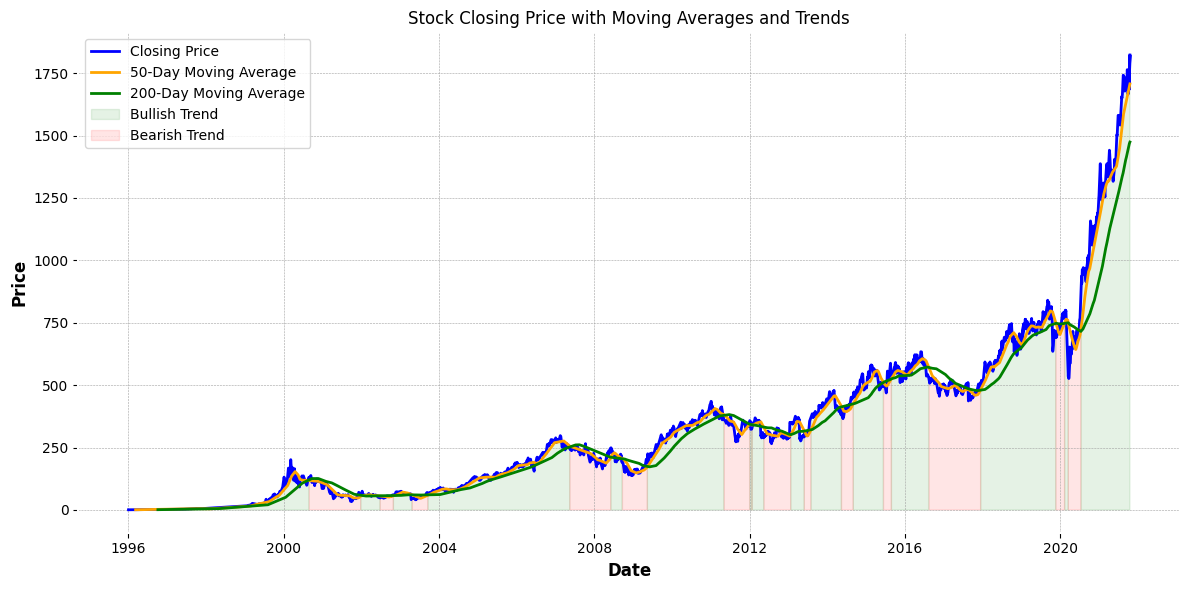

In [ ]:
# Visualize Closing Price with Moving Averages and Trends
# Plot the closing price alongside 50-day and 200-day moving averages to identify trends.
# Highlight bullish and bearish trends using green and red shading.

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Closing Price', color='blue')
plt.plot(df.index, df['MA50'], label='50-Day Moving Average', color='orange')
plt.plot(df.index, df['MA200'], label='200-Day Moving Average', color='green')
plt.fill_between(df.index, df['Close'], where=df['Trend'], color='green', alpha=0.1, label='Bullish Trend')
plt.fill_between(df.index, df['Close'], where=~df['Trend'], color='red', alpha=0.1, label='Bearish Trend')
plt.title('Stock Closing Price with Moving Averages and Trends')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


 **Candlestick Chart**

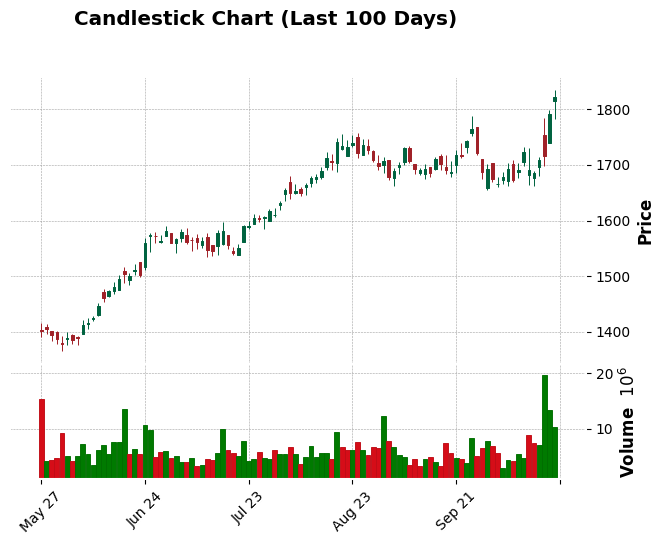

In [ ]:
# Visualize Candlestick Chart
# Generate a candlestick chart for the last 100 trading days to visualize price action and volume.

mpf.plot(df[-100:], type='candle', volume=True, style='charles', title='Candlestick Chart (Last 100 Days)')


**Volatility Over Time**

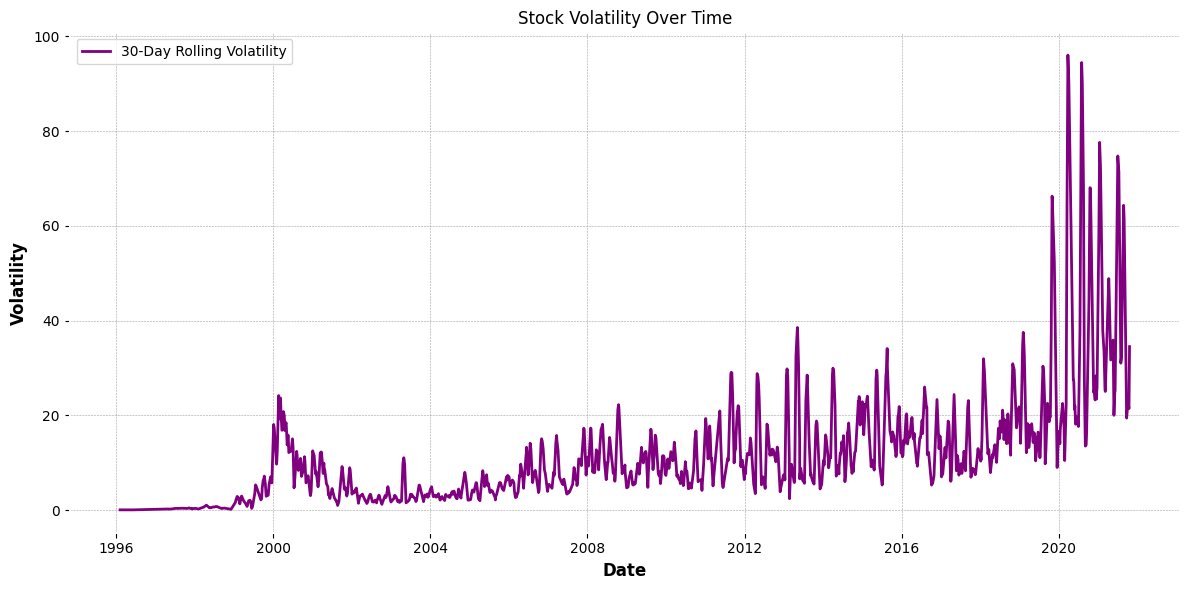

In [ ]:
# Visualize Volatility Over Time
#Plot the 30-day rolling standard deviation to illustrate price fluctuations over time.

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Volatility'], label='30-Day Rolling Volatility', color='purple')
plt.title('Stock Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Daily Return Distribution**

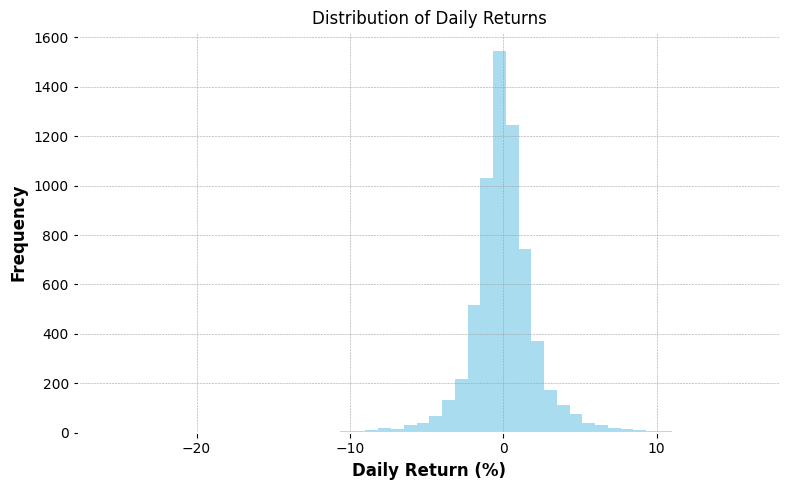

In [ ]:
# Visualize Daily Return Distribution
# Plot the histogram of daily returns to analyze their distribution and understand return behavior.

plt.figure(figsize=(8, 5))
plt.hist(df['Daily Return %'], bins=50, color='skyblue', alpha=0.7)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


# **Insights and Recommendations**

In [ ]:
# Summarize findings from the analysis
print("\n--- Insights and Recommendations ---\n")
print(f"1. Bullish Trends: Identified periods with a 50-day MA above the 200-day MA.")
print(f"2. Volatility: Significant volatility observed, standard deviation of closing prices is {std_closing_price:.2f}.")
print(f"3. Average Daily Return: {average_daily_return:.2f}%, indicating moderate growth.")
print(f"4. Recommendations:")
print(f"   - Consider investing during identified bullish periods.")
print(f"   - Avoid trading during high volatility phases for risk-averse strategies.")



--- Insights and Recommendations ---

1. Bullish Trends: Identified periods with a 50-day MA above the 200-day MA.
2. Volatility: Significant volatility observed, standard deviation of closing prices is 317.35.
3. Average Daily Return: 0.02%, indicating moderate growth.
4. Recommendations:
   - Consider investing during identified bullish periods.
   - Avoid trading during high volatility phases for risk-averse strategies.
